# PoC based on https://github.com/codebasics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


C:\Dev\conda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Dev\conda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


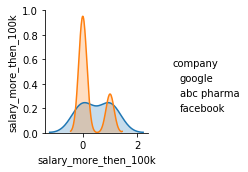

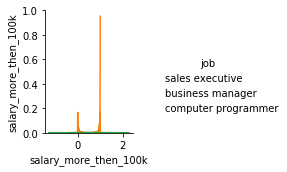

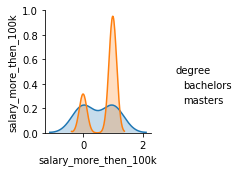

In [3]:
sns.pairplot(df,hue='company')
sns.pairplot(df,hue='job')
sns.pairplot(df,hue='degree')

In [4]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [5]:

target = df['salary_more_then_100k']

In [38]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [8]:
inputs[:5]

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [9]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
display(inputs_n[:5])

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [10]:
target[:5]

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(inputs_n, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
model.score(inputs_n,target)

1.0

### Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?



In [14]:
model.predict([[2,1,0]])

array([0], dtype=int64)

### Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [15]:
model.predict([[2,1,1]])

array([1], dtype=int64)

# Ploting the tree

In [16]:
import graphviz

In [17]:
mytree = model.fit(inputs_n, target)

In [34]:
feature_cols = inputs_n.columns.tolist()

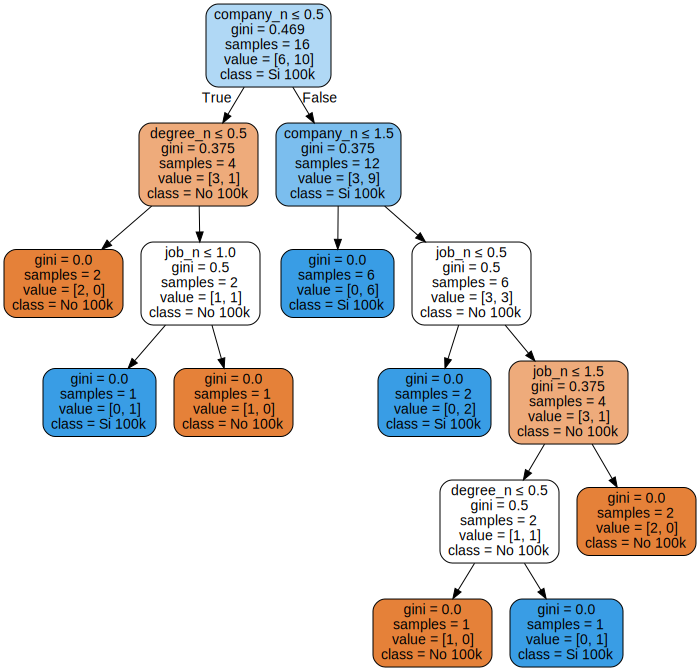

In [37]:
# tree.plot_tree(mytree)
dot_data = tree.export_graphviz(mytree, 
                                out_file=None, 
                                feature_names=feature_cols,  
                                class_names=['No 100k','Si 100k'],  
                                filled=True, rounded=True,  
                                special_characters=True
                               )  
graph = graphviz.Source(dot_data)  
graph